<a href="https://colab.research.google.com/github/AndrewMarksArt/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-makefeatures/LS_DS_124_Make_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [82]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-05-02 23:54:13--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip.1’

LoanStats_2018Q4.cs     [        <=>         ]  21.40M  1.67MB/s    in 13s     

2019-05-02 23:54:26 (1.65 MB/s) - ‘LoanStats_2018Q4.csv.zip.1’ saved [22444881]



In [83]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
replace LoanStats_2018Q4.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: LoanStats_2018Q4.csv    


In [84]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [0]:
import pandas as pd

In [86]:
df = pd.read_csv(filepath_or_buffer='LoanStats_2018Q4.csv', sep=',', skiprows=1, skipfooter=2)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,36 months,10.33%,324.23,B,B1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,4000,4000,4000.0,36 months,23.40%,155.68,E,E1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,9600,9600,9600.0,36 months,12.98%,323.37,B,B5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,2500,2500,2500.0,36 months,13.56%,84.92,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
!tail LoanStats_2018Q4.csv

"","","5600","5600","5600"," 36 months"," 13.56%","190.21","C","C1","","n/a","RENT","15600","Not Verified","Oct-2018","Current","n","","","credit_card","Credit card refinancing","836xx","ID","15.31","0","Aug-2012","0","","97","9","1","5996","34.5%","11","w","4816.58","4816.58","1130.71","1130.71","783.42","347.29","0.0","0.0","0.0","Apr-2019","190.21","May-2019","Apr-2019","0","","1","Individual","","","","0","0","5996","0","0","0","1","20","0","","0","2","3017","35","17400","1","0","0","3","750","4689","45.5","0","0","20","73","13","13","0","13","","20","","0","3","5","4","4","1","9","10","5","9","0","0","0","0","100","25","1","0","17400","5996","8600","0","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","23000","23000","23000"," 36 months"," 15.02%","797.53","C","C3","Tax Consultant","10+ years","MORTGAGE","75000","Source Verified","Oct-2018","Charged Off","n","","","debt_consolidation","Debt consolidation","352xx","AL","20.95

In [88]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128407,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128408,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128409,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128410,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128411,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df.shape

(128412, 144)

In [90]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,desc,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,128412.000000,128412.000000,128412.000000,128412.000000,1.284120e+05,0.0,0.0,128175.000000,...,1.0,1.00,1.0,1.0,1.00,1.00,1.00,7.000000,7.000000,7.0
mean,NaN,NaN,15971.321021,15971.321021,15968.498166,463.259353,8.279733e+04,NaN,NaN,19.933178,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,4373.588571,61.448571,14.0
std,NaN,NaN,10150.384233,10150.384233,10152.168970,285.718256,1.082985e+05,NaN,NaN,20.143542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2985.404770,7.486945,4.0
min,NaN,NaN,1000.000000,1000.000000,725.000000,30.480000,0.000000e+00,NaN,NaN,0.000000,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,699.120000,45.010000,8.0
25%,NaN,NaN,8000.000000,8000.000000,8000.000000,253.630000,4.705800e+04,NaN,NaN,11.760000,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,2739.500000,62.500000,12.0
50%,NaN,NaN,14000.000000,14000.000000,14000.000000,382.905000,6.800000e+04,NaN,NaN,17.990000,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,3980.000000,65.000000,12.0
75%,NaN,NaN,21600.000000,21600.000000,21600.000000,622.680000,9.900000e+04,NaN,NaN,25.300000,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,5169.000000,65.005000,18.0
max,NaN,NaN,40000.000000,40000.000000,40000.000000,1618.240000,9.757200e+06,NaN,NaN,999.000000,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,10119.000000,65.120000,18.0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128412 entries, 0 to 128411
Columns: 144 entries, id to settlement_term
dtypes: float64(57), int64(51), object(36)
memory usage: 141.1+ MB


In [92]:
df.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [93]:
df.shape[0]

128412

In [94]:
df.isnull().sum(axis=0).sort_values(ascending=False)/len(df)

id                                            1.000000
member_id                                     1.000000
url                                           1.000000
desc                                          1.000000
hardship_dpd                                  0.999992
deferral_term                                 0.999992
hardship_amount                               0.999992
hardship_start_date                           0.999992
hardship_end_date                             0.999992
payment_plan_start_date                       0.999992
hardship_length                               0.999992
orig_projected_additional_accrued_interest    0.999992
hardship_loan_status                          0.999992
hardship_reason                               0.999992
hardship_payoff_balance_amount                0.999992
hardship_last_payment_amount                  0.999992
hardship_type                                 0.999992
hardship_status                               0.999992
settlement

## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [95]:
df.dtypes.value_counts()

float64    57
int64      51
object     36
dtype: int64

In [96]:
df['int_rate'].head()

0     10.33%
1     23.40%
2     17.97%
3     12.98%
4     13.56%
Name: int_rate, dtype: object

### Convert `int_rate`

Define a function to remove percent signs from strings and convert to floats

In [0]:
def strip_percent(x_str):
  return float(x_str.strip('%'))

Apply the function to the `int_rate` column

In [98]:
df['int_rate'] = df['int_rate'].apply(lambda x: str(x) + '%')
df['int_rate'].head()

0     10.33%%
1     23.40%%
2     17.97%%
3     12.98%%
4     13.56%%
Name: int_rate, dtype: object

In [99]:
df['int_rate'] = df['int_rate'].apply(strip_percent)
df['int_rate'].dtype

dtype('float64')

In [100]:
df['int_rate'].apply(lambda x_str: float(x_str.strip('%')))

AttributeError: ignored

### Clean `emp_title`

Look at top 20 titles

In [101]:
df['emp_title'].head(10)

0                   NaN
1              Security
2        Administrative
3                   NaN
4                  Chef
5           Postmaster 
6              Operator
7    Nursing Supervisor
8               Manager
9      Material Handler
Name: emp_title, dtype: object

How often is `emp_title` null?

In [102]:
df['emp_title'].value_counts(dropna=False).head(20)

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Operations Manager      387
Truck Driver            387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

Clean the title and handle missing values

In [103]:
df['emp_title'].isnull().sum()

20947

In [0]:
import numpy as np

In [0]:
def clean_title(title):
  if isinstance(title, str):
    return title.strip().lower()
  else:
    return 'unknown'

In [106]:
df['emp_title'] = df['emp_title'].apply(clean_title)
df['emp_title'].head()

0           unknown
1          security
2    administrative
3           unknown
4              chef
Name: emp_title, dtype: object

In [107]:
df['emp_title'].value_counts(dropna=False).head(20)

unknown               20947
teacher                2557
manager                2395
registered nurse       1418
driver                 1258
supervisor             1160
truck driver            920
rn                      834
office manager          805
sales                   803
general manager         791
project manager         720
owner                   625
director                523
operations manager      518
sales manager           500
police officer          440
nurse                   425
technician              420
engineer                412
Name: emp_title, dtype: int64

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [108]:
df['emp_title_manager'] = df['emp_title'].str.contains('manager')
df['emp_title_manager'].head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
9    False
Name: emp_title_manager, dtype: bool

In [0]:
df.to_csv('tmp.csv', index=False)

In [110]:
df_2 = pd.read_csv('tmp.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (123,124,125,128,129,130,133,138,139,140) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [111]:
df_2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager
0,NaN,NaN,10000,10000,10000.0,36 months,10.33,324.23,B,B1,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
1,NaN,NaN,4000,4000,4000.0,36 months,23.40,155.68,E,E1,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
3,NaN,NaN,9600,9600,9600.0,36 months,12.98,323.37,B,B5,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
4,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False


In [112]:
df['emp_title'].nunique()

34902

In [0]:
idx_manager = df['emp_title_manager'] == True
df_managers = df[idx_manager]

In [114]:
df_managers.shape

(17885, 145)

In [0]:
idx_nonmanager = df['emp_title_manager'] == False
df_nonmanagers = df[idx_nonmanager]

In [116]:
df_nonmanagers.shape

(110527, 145)

In [0]:
del df_2

In [0]:
del df

In [117]:
df_managers['int_rate'].mean()

12.76060162146994

In [118]:
df_nonmanagers['int_rate'].mean()

12.957682014350915

In [119]:
print(df_managers['int_rate'].std(), df_nonmanagers['int_rate'].std())

5.070847083428044 5.092995080869786


In [0]:
%matplotlib inline

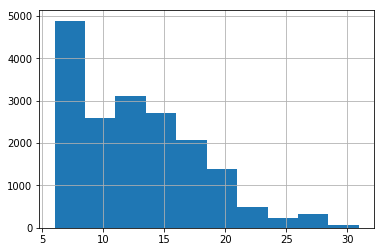

In [122]:
df_managers['int_rate'].hist()

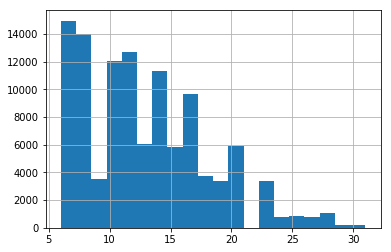

In [124]:
df_nonmanagers['int_rate'].hist(bins=20)

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [126]:
for col_name in df.columns:
  if col_name.endswith("_d"):
    print(col_name)

issue_d
last_pymnt_d
next_pymnt_d
last_credit_pull_d


In [127]:
df['issue_d'].head()

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
Name: issue_d, dtype: object

In [129]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['issue_d'].head()

0   2018-12-01
1   2018-12-01
2   2018-12-01
3   2018-12-01
4   2018-12-01
Name: issue_d, dtype: datetime64[ns]

In [130]:
df['issue_d'].dt.year.head()

0    2018
1    2018
2    2018
3    2018
4    2018
Name: issue_d, dtype: int64

In [132]:
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month
df[['issue_month','issue_year']].head()

,issue_month,issue_year
0,12,2018
1,12,2018
2,12,2018
3,12,2018
4,12,2018


# ASSIGNMENT

- Replicate the lesson code.

- Convert the `term` column from string to integer.

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
def convert_term(x_str):
  return int(x_str[:3])

In [0]:
df['term'] = df['term'].apply(convert_term)


In [146]:
df['term'].value_counts()

36    88179
60    40233
Name: term, dtype: int64

In [148]:
df['loan_status'].value_counts()

Current               119540
Fully Paid              6367
Late (31-120 days)      1168
In Grace Period          666
Late (16-30 days)        350
Charged Off              319
Default                    2
Name: loan_status, dtype: int64

In [149]:
df['loan_status'].head()

0    Current
1    Current
2    Current
3    Current
4    Current
Name: loan_status, dtype: object

In [0]:
df['emp_title_manager'] = df['emp_title'].str.contains('manager')

In [0]:
df['loan_status_is_great'] = df['loan_status'].str.contains('Current|Fully Paid')

In [153]:
df['loan_status_is_great'].value_counts()

True     125907
False      2505
Name: loan_status_is_great, dtype: int64

In [157]:
df['loan_status_is_great'].astype(int).value_counts()

1    125907
0      2505
Name: loan_status_is_great, dtype: int64

In [158]:
df['last_pymnt_d'].head()

0    Apr-2019
1    Apr-2019
2    Apr-2019
3    Apr-2019
4    Apr-2019
Name: last_pymnt_d, dtype: object

In [0]:
to_DateTime = pd.to_datetime(df['last_pymnt_d'])

In [166]:
to_DateTime.head()

0   2019-04-01
1   2019-04-01
2   2019-04-01
3   2019-04-01
4   2019-04-01
Name: last_pymnt_d, dtype: datetime64[ns]

In [0]:
df['last_pymnt_d_month'] = to_DateTime.dt.month

In [0]:
df['last_pymnt_d_year'] = to_DateTime.dt.year

In [171]:
df[['last_pymnt_d_month', 'last_pymnt_d_year']].head()

,last_pymnt_d_month,last_pymnt_d_year
0,4.0,2019.0
1,4.0,2019.0
2,4.0,2019.0
3,4.0,2019.0
4,4.0,2019.0


# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01